<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span><ul class="toc-item"><li><span><a href="#Разобьем-данные-на-выборки" data-toc-modified-id="Разобьем-данные-на-выборки-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Разобьем данные на выборки</a></span></li></ul></li><li><span><a href="#Изучим-модели-без-учета-дисбаланса" data-toc-modified-id="Изучим-модели-без-учета-дисбаланса-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Изучим модели без учета дисбаланса</a></span></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span><ul class="toc-item"><li><span><a href="#Обучение-моделей-на-сбалансированных-данных" data-toc-modified-id="Обучение-моделей-на-сбалансированных-данных-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Обучение моделей на сбалансированных данных</a></span></li></ul></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.


## Подготовка данных

In [115]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, roc_auc_score, roc_curve

In [116]:
#Загружаем данные

data = pd.read_csv('/datasets/Churn.csv')

In [117]:
#Напишем функцию, которая предоставит нам полную информацию о данных

def study(data): 
    info = display(data.head(10)), data.info(), display(data.describe())

In [118]:
#Сделаем вызов функции и просмотрим информацию о данных

study(data)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8.0,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7.0,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4.0,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4.0,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2.0,134603.88,1,1,1,71725.73,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,9091.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,4.997690,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.894723,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,2.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


# Описание данных

**RowNumber** — индекс строки в данных

**CustomerId** — уникальный идентификатор клиента

**Surname** — фамилия

**CreditScore** — кредитный рейтинг

**Geography** — страна проживания

**Gender** — пол

**Age** — возраст

**Tenure** — сколько лет человек является клиентом банка

**Balance** — баланс на счёте

**NumOfProducts** — количество продуктов банка, используемых клиентом

**HasCrCard** — наличие кредитной карты

**IsActiveMember** — активность клиента

**EstimatedSalary** — предполагаемая зарплата

**Exited** — факт ухода клиента

Заметили пропуски в стобце **Tenure**. Остановимся на нем более детально.

In [119]:
data['Tenure'].unique()

array([ 2.,  1.,  8.,  7.,  4.,  6.,  3., 10.,  5.,  9.,  0., nan])

In [120]:
data[data['Tenure'].isnull()]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
30,31,15589475,Azikiwe,591,Spain,Female,39,NaN,0.00,3,1,0,140469.38,1
48,49,15766205,Yin,550,Germany,Male,38,NaN,103391.38,1,0,1,90878.13,0
51,52,15768193,Trevisani,585,Germany,Male,36,NaN,146050.97,2,0,0,86424.57,0
53,54,15702298,Parkhill,655,Germany,Male,41,NaN,125561.97,1,0,0,164040.94,1
60,61,15651280,Hunter,742,Germany,Male,35,NaN,136857.00,1,0,0,84509.57,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9944,9945,15703923,Cameron,744,Germany,Male,41,NaN,190409.34,2,1,1,138361.48,0
9956,9957,15707861,Nucci,520,France,Female,46,NaN,85216.61,1,1,0,117369.52,1
9964,9965,15642785,Douglas,479,France,Male,34,NaN,117593.48,2,0,0,113308.29,0
9985,9986,15586914,Nepean,659,France,Male,36,NaN,123841.49,2,1,0,96833.00,0


Пропусков прилично и чем они вызваны не ясно. Заменим их на медианное значение, так будет более корректно, по моему мнению.

In [121]:
#Обработаем пропуски

data['Tenure'] = data['Tenure'].fillna(data['Tenure'].median())

#Посмотрим изменения

data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,4.99790,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.76001,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.00000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.00000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.00000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.00000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.00000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [122]:
#Убедимся, что пропусков больше нет

data['Tenure'].unique()

array([ 2.,  1.,  8.,  7.,  4.,  6.,  3., 10.,  5.,  9.,  0.])

In [123]:
#Изменим тип данных на целочисленный

data['Tenure'] = data['Tenure'].astype('int')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [124]:
#Проверим на явные дубликаты

data.duplicated().sum()

0

In [125]:
#Сделаем названия столбцов более читаемыми

data = data.rename(columns={'RowNumber':'Row_Number', 'CustomerId':'Customer_Id', 'CreditScore':'Credit_Score',
       'NumOfProducts':'Num_Of_Products', 'HasCrCard':'Has_Cr_Card',
       'IsActiveMember':'Is_Active_Member', 'EstimatedSalary':'Estimated_Salary'})

In [126]:
#Приведем названия к нижнему регистру

data.columns = data.columns.str.lower()

data.head()

,row_number,customer_id,surname,credit_score,geography,gender,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Вывод

**row_number** — в этом столбце содержится информация об индексах строк, в дальнейшем, при работе с данным, он нам будет не нужен.

**customer_id** — столбец хранит в себе информацию о идентификаторах пользователей. Этот столбец никак не пригодится нам для обучения.

**surname** — в столбце представлены фамилии клиентов, эта информация нам не нужна в дальнейшем.

**age** и **exited** — типы данных соответствуют действительности.

**tenure** — заполнили пропуски медианным значением и изменили тип данных на целочисленный.

**Явных дубликатов не выявлено.**

**Привели в порядок названия стобцов.**

## Исследование задачи

Создадим отдельный DataFrame с данными, которые нам в дальнейшем понадобятся для машинного обучения. 

In [127]:
#Столбцы, которые не войдут в новый DataFrame

drop = ['row_number','customer_id', 'surname']

#Создаем новый DataFrame

data_ml = data.drop(drop, axis=1)

#Посмотрим на новый DataFrame

data_ml.head()

,credit_score,geography,gender,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [128]:
#Посмотрим размер

data_ml.shape

(10000, 11)

In [129]:
#Чтобы не попасть в Дамми-ловушку, применим к данным функцию get_dummies

data_ml = pd.get_dummies(data_ml, drop_first=True)


#Посмотрим на обновленные данные
data_ml.head()

,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited,geography_Germany,geography_Spain,gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [130]:
#Посмотрим на изменившийся размер

data_ml.shape

(10000, 12)

Количество столбцов увеличилось на 1. Столбец **geography** разделился на 2 новых **geography_Germany** и **geography_Spain**. Столбец **gender** стал **gender_Male**.

In [131]:
#Приведем столбцы к одному регистру

data_ml.columns = data_ml.columns.str.lower()

data_ml.head()

,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited,geography_germany,geography_spain,gender_male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


### Разобьем данные на выборки

Данные разобьем на три части: обучающую, валидационную и тестовую. Исходные данные разбивают в соотношении 3:1:1.

In [132]:
#Разделим на признаки и целевой признак

features = data_ml.drop('exited', axis=1)

target = data_ml['exited']

In [133]:
#Обучающая выборка

features_train, features_test, target_train, target_test = train_test_split(features,
                                                    target,
                                                    train_size=0.6,
                                                    random_state=12345)

In [134]:
#Валидационная и тестовая выборки

features_valid, features_test, target_valid, target_test = train_test_split(features_test,
                                                    target_test,
                                                    train_size=0.5,
                                                    random_state=12345)

**Обучающая выборка** - features_train, target_train;

**Валидационная выборка** - features_valid, target_valid;

**Тестовая выборка** - features_test, target_test.

In [135]:
#Проверим разбивку на соотношение 3:1:1

features_train.shape, features_valid.shape, features_test.shape

((6000, 11), (2000, 11), (2000, 11))

In [136]:
#Для масштабирования методом scaler выделим численные признаки

numeric = ['credit_score', 'age', 'tenure', 'balance', 'num_of_products', 'estimated_salary']

In [137]:
scaler = StandardScaler()

scaler.fit(features_train[numeric])

StandardScaler()

In [138]:
#Масштабируем численные признаки обучающей выборки

pd.options.mode.chained_assignment = None

features_train[numeric] = scaler.transform(features_train[numeric])

features_train.head()


,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,geography_germany,geography_spain,gender_male
7479,-0.886751,-0.373192,1.082277,1.232271,-0.891560,1,0,-0.187705,0,1,1
3411,0.608663,-0.183385,1.082277,0.600563,-0.891560,0,0,-0.333945,0,0,0
6027,2.052152,0.480939,-0.737696,1.027098,0.830152,0,1,1.503095,1,0,1
1247,-1.457915,-1.417129,0.354288,-1.233163,0.830152,1,0,-1.071061,0,0,1
3716,0.130961,-1.132419,-1.101690,1.140475,-0.891560,0,0,1.524268,1,0,0


In [139]:
#Масштабируем численные признаки валидационной выборки 

pd.options.mode.chained_assignment = None

features_valid[numeric] = scaler.transform(features_valid[numeric])

features_valid.head()

,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,geography_germany,geography_spain,gender_male
8532,-0.699824,-0.373192,-1.101690,-1.233163,0.830152,1,0,-0.015173,0,0,0
5799,-0.284431,0.575842,-0.737696,-1.233163,-0.891560,1,1,1.471724,0,0,0
5511,0.151731,-0.657902,-1.829679,0.438711,-0.891560,1,0,-1.367107,1,0,1
7365,-0.876366,-0.278288,1.810266,1.239884,-0.891560,1,1,-0.786517,0,1,0
7367,-0.481743,0.291132,1.810266,-1.233163,0.830152,1,0,1.358533,0,1,1


In [140]:
#Масштабируем численные признаки тестовой выборки 

pd.options.mode.chained_assignment = None

features_test[numeric] = scaler.transform(features_test[numeric])

features_test.head()

,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,geography_germany,geography_spain,gender_male
7041,-2.226392,-0.088482,-1.101690,-1.233163,0.830152,1,0,0.647083,0,0,1
5709,-0.087120,0.006422,1.446272,-1.233163,-0.891560,1,0,-1.658410,0,0,0
7117,-0.917905,-0.752805,-0.009707,0.722307,-0.891560,1,1,-1.369334,0,1,1
7775,-0.253277,0.101325,1.810266,-1.233163,0.830152,1,0,0.075086,0,1,1
8735,0.785204,-0.847708,1.810266,0.615625,-0.891560,0,1,-1.070919,0,0,1


## Изучим модели без учета дисбаланса

Попробуем с помощью циклов найти лучшие гиперпараметры для моделей Случайный лес и Дерево решений.

# Случайный лес

Для начала найдем лучшую модель, рассматривая глубину деревьев от 1 до 15 и количество деревьев от 1 до 51 для лучших показателей модели.

In [141]:
# Рассмотрим глубины дерева от 1 до 15 с шагом 1
score = [] #Список понадобится нам, чтобы удобнее было искать самый высокий показатель меры f1

for depth in range(1,15,1):
    for n in range(1,51,3):
        model_rf =  RandomForestClassifier(max_depth=depth,n_estimators=n,random_state=12345).fit(features_train,target_train)
        prediction = model_rf.predict(features_valid)
        f1 = f1_score(target_valid,prediction)
        score.append(f1)
        print('Глубина дерева:',depth, 'Количество лесов:',n, f1)
print(max(score))

Глубина дерева: 1 Количество лесов: 1 0.2484725050916497
Глубина дерева: 1 Количество лесов: 4 0.0
Глубина дерева: 1 Количество лесов: 7 0.0
Глубина дерева: 1 Количество лесов: 10 0.0
Глубина дерева: 1 Количество лесов: 13 0.0
Глубина дерева: 1 Количество лесов: 16 0.0
Глубина дерева: 1 Количество лесов: 19 0.0
Глубина дерева: 1 Количество лесов: 22 0.0
Глубина дерева: 1 Количество лесов: 25 0.0
Глубина дерева: 1 Количество лесов: 28 0.0
Глубина дерева: 1 Количество лесов: 31 0.0
Глубина дерева: 1 Количество лесов: 34 0.0
Глубина дерева: 1 Количество лесов: 37 0.0
Глубина дерева: 1 Количество лесов: 40 0.0
Глубина дерева: 1 Количество лесов: 43 0.0
Глубина дерева: 1 Количество лесов: 46 0.0
Глубина дерева: 1 Количество лесов: 49 0.0
Глубина дерева: 2 Количество лесов: 1 0.2484725050916497
Глубина дерева: 2 Количество лесов: 4 0.1294642857142857
Глубина дерева: 2 Количество лесов: 7 0.2
Глубина дерева: 2 Количество лесов: 10 0.2
Глубина дерева: 2 Количество лесов: 13 0.2
Глубина дерева:

In [142]:
probabilities_rf = model_rf.predict_proba(features_valid)

probabilities_one_valid_rf = probabilities_rf[:,1]

auc_roc_rf = roc_auc_score(target_valid,probabilities_one_valid_rf)
print(auc_roc_rf)

0.837370477682541


Наивысший показатель меры f1 для модели Случайного леса - 0.5891238670694864. Гиперпараметры max_depth(глубина дерева) = 10, а n_estimators(количество лесов) = 10. AUC-ROC модели равен 0.837370477682541.

# Дерево решений

Для поиска лучшей модели также воспользуемся циклом, чтобы найти лучший гиперпараметр глубины дерева. 

In [143]:
# Для поиска лучшего параметра глубины дерева возьмем диапозон от 1 до 15 с шагом 1
score = [] #Список понадобится нам, чтобы удобнее было искать самый высокий показатель меры f1

for depth in range(1,15,1):
    model_dt = DecisionTreeClassifier(max_depth=depth,random_state=12345).fit(features_train,target_train)
    prediction = model_dt.predict(features_valid)
    f1 = f1_score(target_valid,prediction)
    score.append(f1)
    print('Глубина дерева:',depth,f1)
print(max(score))

Глубина дерева: 1 0.0
Глубина дерева: 2 0.5217391304347825
Глубина дерева: 3 0.4234875444839857
Глубина дерева: 4 0.5528700906344411
Глубина дерева: 5 0.5406249999999999
Глубина дерева: 6 0.5696969696969697
Глубина дерева: 7 0.5320813771517998
Глубина дерева: 8 0.5454545454545454
Глубина дерева: 9 0.5633802816901409
Глубина дерева: 10 0.5385694249649369
Глубина дерева: 11 0.5059920106524634
Глубина дерева: 12 0.521072796934866
Глубина дерева: 13 0.5038961038961038
Глубина дерева: 14 0.48675914249684743
0.5696969696969697


In [144]:
probabilities_dt = model_dt.predict_proba(features_valid)

probabilities_one_valid_dt = probabilities_dt[:,1]

auc_roc_dt = roc_auc_score(target_valid,probabilities_one_valid_dt)
print(auc_roc_dt)

0.6880062182810205


Лучшая модель с показателем меры f1 = 0.5696969696969697 выдала такой результат при гиперпараметре max_depth(глубина дерева) = 6. AUC-ROC = 0.6880062182810205.

# Логистическая регрессия

In [145]:
model_lr = LogisticRegression(random_state=12345).fit(features_train,target_train)
prediction = model_lr.predict(features_valid)
print(f1_score(target_valid,prediction))

0.33108108108108103


In [146]:
probabilities_lr = model_lr.predict_proba(features_valid)

probabilities_one_valid_lr = probabilities_lr[:,1]

auc_roc_lr = roc_auc_score(target_valid,probabilities_one_valid_lr)
print(auc_roc_lr)

0.7588026784580114


Модель, обученная логистической регрессией, показала наихудшие результаты. Мера f1 = 0.33108108108108103. AUC-ROC = 0.7588026784580114.

# Вывод

Лучшей из моделей стала модель Случайного леса. При найденных оптимальных гиперпараметрах её мера f1 = 0.5891238670694864. И самый высокий показатель AUC-ROC также у неё - 0.837370477682541.

## Борьба с дисбалансом

In [147]:
#Посмотрим соотношение данных 

target.value_counts()

0    7963
1    2037
Name: exited, dtype: int64

Очевидно, что дисбаланс присутствует. Сбалансируем классы выборки. Для этого напишем функцию upsample. Она разделит обучающую выборку на отрицательные и положительные объекты, увеличит количество положительных объектов, создаст новую обучающую выборку и перемешает данные.

In [148]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled

In [149]:
#Сделаем вызов функции

features_upsampled, target_upsampled = upsample(features_train, target_train, 4)

In [150]:
#Проверим, изменилось ли соотношение

target_upsampled.value_counts()

0    4804
1    4784
Name: exited, dtype: int64

Классы сбалансированны! Но на всякий случай рассмотрим еще один метод борьбы с дисбалансом. Применим технику downsampling. Напишем функцию downsample, которая разделит обучающую выборку на отрицательные и положительные объекты, отбросит часть отрицательных объектов в случайном порядке, а из полученных данных создаст новую обучающую выборку и перемешает данные.

In [151]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345)
    
    return features_downsampled, target_downsampled

In [152]:
#Сделаем вызов функции

features_downsampled, target_downsampled = downsample(features_train, target_train, 0.3)

In [153]:
#Проверим, изменилось ли соотношение

target_downsampled.value_counts()

0    1441
1    1196
Name: exited, dtype: int64

### Обучение моделей на сбалансированных данных

# Модели , обученные на данных, которые были сбалансированы техникой upsampling.

Как и в обучении моделей с дисбалансом, воспользуемся циклами для подбора лучших гиперпараметров для моделей.

# Случайный лес

In [154]:
# Рассмотрим диапозон значений глубины дерева от 1 до 15

score=[] #Список понадобится нам, чтобы удобнее было искать самый высокий показатель меры f1

for depth in range(1,15,1):
    for n in range(1,51,3):
        model_rf =  RandomForestClassifier(max_depth=depth,n_estimators=n,random_state=12345).fit(features_upsampled,target_upsampled)
        prediction = model_rf.predict(features_valid)
        f1 = f1_score(target_valid,prediction)
        score.append(f1)
        print('Глубина дерева:',depth,'Количество лесов:',n,f1)
print(max(score))

Глубина дерева: 1 Количество лесов: 1 0.2484725050916497
Глубина дерева: 1 Количество лесов: 4 0.541015625
Глубина дерева: 1 Количество лесов: 7 0.5466666666666666
Глубина дерева: 1 Количество лесов: 10 0.5159165751920967
Глубина дерева: 1 Количество лесов: 13 0.5336048879837066
Глубина дерева: 1 Количество лесов: 16 0.5336048879837066
Глубина дерева: 1 Количество лесов: 19 0.5336048879837066
Глубина дерева: 1 Количество лесов: 22 0.5318021201413426
Глубина дерева: 1 Количество лесов: 25 0.5452881976212259
Глубина дерева: 1 Количество лесов: 28 0.5452881976212259
Глубина дерева: 1 Количество лесов: 31 0.5221757322175732
Глубина дерева: 1 Количество лесов: 34 0.5241730279898219
Глубина дерева: 1 Количество лесов: 37 0.5403508771929824
Глубина дерева: 1 Количество лесов: 40 0.5373913043478261
Глубина дерева: 1 Количество лесов: 43 0.5377107364685004
Глубина дерева: 1 Количество лесов: 46 0.5373913043478261
Глубина дерева: 1 Количество лесов: 49 0.5451197053406998
Глубина дерева: 2 Количе

In [155]:
probabilities_rf = model_rf.predict_proba(features_valid)

probabilities_one_valid_rf = probabilities_rf[:,1]

auc_roc_rf = roc_auc_score(target_valid,probabilities_one_valid_rf)
print(auc_roc_rf)

0.8442609439931283


Наилучший показатель f1 = 0.6269270298047276, он получился при подобранных гиперпараметрах max_depth = 8 (глубина дерева) и n_estimators = 25 (количество лесов). AUC-ROC = 0.8442609439931283. Модель показывает лучший результат на сбалансированных классах.

# Дерево решений

In [156]:
# Для поиска лучшего параметра глубины дерева возьмем диапозон от 1 до 15 с шагом 1

score = [] #Список понадобится нам, чтобы удобнее было искать самый высокий показатель меры f1

for depth in range(1,15,1):
    model_dt = DecisionTreeClassifier(max_depth=depth,random_state=12345).fit(features_upsampled,target_upsampled)
    prediction = model_dt.predict(features_valid)
    f1 = f1_score(target_valid,prediction)
    score.append(f1)
    print('Глубина дерева:',depth,f1)
print(max(score))

Глубина дерева: 1 0.4994903160040775
Глубина дерева: 2 0.541015625
Глубина дерева: 3 0.541015625
Глубина дерева: 4 0.5277777777777778
Глубина дерева: 5 0.5963791267305644
Глубина дерева: 6 0.5581835383159887
Глубина дерева: 7 0.5524752475247525
Глубина дерева: 8 0.5408560311284047
Глубина дерева: 9 0.5405940594059405
Глубина дерева: 10 0.5159420289855072
Глубина дерева: 11 0.5351521511017839
Глубина дерева: 12 0.5117227319062181
Глубина дерева: 13 0.5119825708061002
Глубина дерева: 14 0.4994375703037121
0.5963791267305644


In [157]:
probabilities_dt = model_dt.predict_proba(features_valid)

probabilities_one_valid_dt = probabilities_dt[:,1]

auc_roc_dt = roc_auc_score(target_valid,probabilities_one_valid_dt)
print(auc_roc_dt)

0.7002197267101785


Лучший показатель меры f1 = 0.5963791267305644, он достигнут при помощи гиперпараметра max_depth = 5 (глубина дерева). AUC-ROC = 0.7002197267101785. Показатели стали чуть лучше на сбалансированных данных, но пока лидирует модель Случайного леса. 

# Логистическая регрессия

In [158]:
model_lr = LogisticRegression(random_state=12345).fit(features_upsampled,target_upsampled)
prediction = model_lr.predict(features_valid)
print(f1_score(target_valid,prediction))

0.4888507718696398


In [159]:
probabilities_lr = model_lr.predict_proba(features_valid)

probabilities_one_valid_lr = probabilities_lr[:,1]

auc_roc_lr = roc_auc_score(target_valid,probabilities_one_valid_lr)
print(auc_roc_lr)

0.7636206364664678


Показатель f1 вырос до 0.4888507718696398. За AUC-ROC также заметен рост - 0.7636206364664678. Баланс классов тоже пошел на пользу модели.

Лучшая модель по показателям меры f1 и AUC-ROC - это модель Случайного леса. Построим ROC-кривую для оценки адекватности.

# Модели , обученные на данных, которые были сбалансированы техникой downsampling.

# Случайный лес

In [160]:
# Рассмотрим диапозон значений глубины дерева от 1 до 15

score=[] #Список понадобится нам, чтобы удобнее было искать самый высокий показатель меры f1

for depth in range(1,15,1):
    for n in range(1,51,3):
        model_rf_d =  RandomForestClassifier(max_depth=depth,n_estimators=n,random_state=12345).fit(features_downsampled, target_downsampled)
        prediction = model_rf_d.predict(features_valid)
        f1 = f1_score(target_valid,prediction)
        score.append(f1)
        print('Глубина дерева:',depth,'Количество лесов:',n,f1)
print(max(score))

Глубина дерева: 1 Количество лесов: 1 0.2484725050916497
Глубина дерева: 1 Количество лесов: 4 0.5447667087011349
Глубина дерева: 1 Количество лесов: 7 0.5371120107962214
Глубина дерева: 1 Количество лесов: 10 0.4055944055944056
Глубина дерева: 1 Количество лесов: 13 0.4131944444444444
Глубина дерева: 1 Количество лесов: 16 0.4714714714714715
Глубина дерева: 1 Количество лесов: 19 0.5583126550868488
Глубина дерева: 1 Количество лесов: 22 0.5566502463054187
Глубина дерева: 1 Количество лесов: 25 0.5432098765432098
Глубина дерева: 1 Количество лесов: 28 0.5391304347826086
Глубина дерева: 1 Количество лесов: 31 0.5361596009975063
Глубина дерева: 1 Количество лесов: 34 0.5437908496732026
Глубина дерева: 1 Количество лесов: 37 0.5519053876478319
Глубина дерева: 1 Количество лесов: 40 0.5591133004926109
Глубина дерева: 1 Количество лесов: 43 0.5271739130434783
Глубина дерева: 1 Количество лесов: 46 0.5563725490196078
Глубина дерева: 1 Количество лесов: 49 0.5567765567765567
Глубина дерева: 2

In [161]:
probabilities_rf_d = model_rf_d.predict_proba(features_valid)

probabilities_one_valid_rf_d = probabilities_rf_d[:,1]

auc_roc_rf_d = roc_auc_score(target_valid,probabilities_one_valid_rf_d)
print(auc_roc_rf_d)

0.8406172309292943


Наилучший показатель f1 = 0.6259220231822971, он получился при подобранных гиперпараметрах max_depth = 6 (глубина дерева) и n_estimators = 40 (количество лесов). AUC-ROC = 0.8406172309292943. Модель показывает лучший результат на сбалансированных классах.

# Дерево решений

In [162]:
# Для поиска лучшего параметра глубины дерева возьмем диапозон от 1 до 15 с шагом 1

score = [] #Список понадобится нам, чтобы удобнее было искать самый высокий показатель меры f1

for depth in range(1,15,1):
    model_dt_d = DecisionTreeClassifier(max_depth=depth,random_state=12345).fit(features_downsampled, target_downsampled)
    prediction = model_dt_d.predict(features_valid)
    f1 = f1_score(target_valid,prediction)
    score.append(f1)
    print('Глубина дерева:',depth,f1)
print(max(score))

Глубина дерева: 1 0.5061845861084681
Глубина дерева: 2 0.5394495412844036
Глубина дерева: 3 0.5394495412844036
Глубина дерева: 4 0.5491329479768786
Глубина дерева: 5 0.579212916246216
Глубина дерева: 6 0.5789473684210527
Глубина дерева: 7 0.5588235294117647
Глубина дерева: 8 0.5572441742654509
Глубина дерева: 9 0.5313092979127135
Глубина дерева: 10 0.5355871886120996
Глубина дерева: 11 0.5246511627906976
Глубина дерева: 12 0.5253456221198157
Глубина дерева: 13 0.5276073619631901
Глубина дерева: 14 0.5176056338028169
0.579212916246216


In [164]:
probabilities_dt_d = model_dt_d.predict_proba(features_valid)

probabilities_one_valid_dt_d = probabilities_dt_d[:,1]

auc_roc_dt_d = roc_auc_score(target_valid,probabilities_one_valid_dt_d)
print(auc_roc_dt_d)

0.7232040781761322


Лучший показатель меры f1 = 0.579212916246216, он достигнут при помощи гиперпараметра max_depth = 5 (глубина дерева). AUC-ROC = 0.7232040781761322. Показатели стали чуть лучше на сбалансированных данных.

# Логистическая регрессия

In [165]:
model_lr_d = LogisticRegression(random_state=12345).fit(features_downsampled, target_downsampled)
prediction = model_lr_d.predict(features_valid)
print(f1_score(target_valid,prediction))

0.497164461247637


In [166]:
probabilities_lr_d = model_lr_d.predict_proba(features_valid)

probabilities_one_valid_lr_d = probabilities_lr_d[:,1]

auc_roc_lr_d = roc_auc_score(target_valid,probabilities_one_valid_lr_d)
print(auc_roc_lr_d)

0.7637461513800592


Показатель f1 вырос до 0.497164461247637. За AUC-ROC также заметен рост - 0.7637461513800592. Баланс классов тоже пошел на пользу модели.

In [167]:
table_1 = {'Случайный лес':np.array([0.5891238670694864,0.6269270298047276,0.6259220231822971,
                                     0.837370477682541,0.8442609439931283,0.8406172309292943]),
           'Дерево Решения':np.array([0.5696969696969697,0.5963791267305644,0.579212916246216,
                                      0.6880062182810205,0.7002197267101785,0.7232040781761322]),
           'Логистическая регрессия':np.array([0.33108108108108103,0.4888507718696398,0.497164461247637,
                                               0.7588026784580114,0.7636312220615901,0.7637461513800592])}

table_total = pd.DataFrame(table_1,index=['F1 без учета дисбаланса','F1 с учетом дисбаланса(upsampling)', 
                                          'F1 с учетом дисбаланса(downsampling)',
                                          'AUC-ROC без учета дисбаланса','AUC-ROC с учетом дисбаланса(upsampling)',
                                          'AUC-ROC с учетом дисбаланса(downsampling)'])

table_total

,Случайный лес,Дерево Решения,Логистическая регрессия
F1 без учета дисбаланса,0.589124,0.569697,0.331081
F1 с учетом дисбаланса(upsampling),0.626927,0.596379,0.488851
F1 с учетом дисбаланса(downsampling),0.625922,0.579213,0.497164
AUC-ROC без учета дисбаланса,0.837370,0.688006,0.758803
AUC-ROC с учетом дисбаланса(upsampling),0.844261,0.700220,0.763631
AUC-ROC с учетом дисбаланса(downsampling),0.840617,0.723204,0.763746


Можем сделать вывод, что, в данном случае, техника для балансирования классов upsampling справилась со своей задачей немного лучше, чем техника downsampling,. Логистической регрессии пришлись по духу данные, сбалансированные техникой downsampling.

Лучшая модель по показателям меры f1 и AUC-ROC - это модель Случайного леса, обученная на сбалансированных данных по технике upsampling. Построим ROC-кривую для оценки адекватности.

# ROC-кривая лучшей модели

In [168]:
fpr_rf,tpr_rf,thresholds = roc_curve(target_valid,probabilities_one_valid_rf)

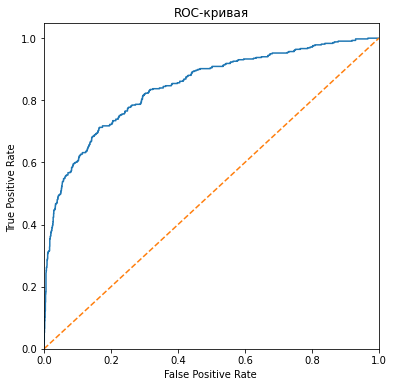

In [169]:
plt.figure(figsize=(6, 6))
plt.plot(fpr_rf, tpr_rf)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate ')
plt.ylabel('True Positive Rate ')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('ROC-кривая')
plt.show() 


Произведем тестирование модели.

# Тестирование модели

In [170]:
prediction = model_rf.predict(features_test)

print(f1_score(target_test, prediction))

0.6019656019656019


Итоговая задача выполнена. Нам удалось достичь показатель f1 меры не менее 0.59.

# Общий вывод

Для решения задачи нам в первую очередь потребовалось подготовить данные для дальнейшего взаимодействия с ними. В столбце **tenure** заменили пропуски на медианное значение и изменили тип данных на целочисленный. Привели названия столбцов к нижнему регистру, явных дубликатов не выявили. Создали новый DataFrame без ненужной для нас информации. С помощью техники OHE преобразовали данные в столбцах. Разбили данные на выборки: обучающую, валидационную и тестовую. Произвели масштабирование признаков. Обучили модели на данных без учета дисбаланса. Лучшие результаты показала модель Случайного леса с найденными гиперпараметрами max_depth=10, n_estimators = 10. При этих параметрах f1 = 0.5891238670694864, AUC-ROC модели равен 0.837370477682541. Решили проблему дисбаланса и на новых данных обучили модели. Лучший показатель меры f1, как и в прошлый раз, оказался у модели Случайного леса: f1 = 0.6269270298047276, он получился при подобранных гиперпараметрах max_depth = 8 (глубина дерева) и n_estimators = 25(количество лесов), AUC-ROC = 0.8442609439931283. Построили ROC-кривую, которая показывает отличие нашей модели от случайной. Протестировали модель на тестовой выборке, получили показатель меры f1 = 0.6019656019656019.